Installing Packages



In [1]:
import nltk
import pandas as pd
import numpy as np
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
from textblob import TextBlob
import requests
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('stopwords')
nltk.download('words')
stop_words = stopwords.words('english')
words = set(nltk.corpus.words.words())
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Loading SemEval Dataset

In [2]:
path_to_test_file = "/content/TEST_FILE.txt"
path_to_file = "/content/TRAIN_FILE.TXT"

In [3]:
def load_data_label(path):
    temp_data = []
    lines = [line.strip() for line in open(path)]
    for idx in range(0, len(lines), 4):
        id = lines[idx].split("\t")[0]
        relation = lines[idx + 1]

        sentence = lines[idx].split("\t")[1][1:-1]
        sentence = sentence.replace("<e1>", " _e1_ ").replace("</e1>", " _/e1_ ")
        sentence = sentence.replace("<e2>", " _e2_ ").replace("</e2>", " _/e2_ ")
        sentence = sentence.replace("<e1>", "<e1> ").replace("</e1>", " </e11>")
        sentence = sentence.replace("<e2>", "<e2> ").replace("</e2>", " </e22>")

        tokens = nltk.word_tokenize(sentence)

        tokens.remove('_/e1_')
        tokens.remove('_/e2_')

        e1 = tokens.index("_e1_")
        del tokens[e1]
        element1=tokens[e1]
        e2 = tokens.index("_e2_")
        del tokens[e2]
        element2=tokens[e2]
        sentence = " ".join(tokens)
        temp_data.append([id, sentence, e1, element1, e2, element2, relation])
    df = pd.DataFrame(data=temp_data, columns=["id", "sentence", "e1_position","element1", "e2_position","element2", "class"])
    #print (df)
    labelsMapping = {'Other': 0,'Message-Topic(e1,e2)': 1, 'Message-Topic(e2,e1)': 2,
                    'Product-Producer(e1,e2)': 3, 'Product-Producer(e2,e1)': 4,
                    'Instrument-Agency(e1,e2)': 5, 'Instrument-Agency(e2,e1)': 6,
                    'Entity-Destination(e1,e2)': 7, 'Entity-Destination(e2,e1)': 8,
                    'Cause-Effect(e1,e2)': 9, 'Cause-Effect(e2,e1)': 10,
                    'Component-Whole(e1,e2)': 11, 'Component-Whole(e2,e1)': 12,
                    'Entity-Origin(e1,e2)': 13, 'Entity-Origin(e2,e1)': 14,
                    'Member-Collection(e1,e2)': 15, 'Member-Collection(e2,e1)': 16,
                    'Content-Container(e1,e2)': 17, 'Content-Container(e2,e1)': 18}
    df['tag'] = [labelsMapping[r] for r in df['class']]
    #print(df)
    x_sentence = df['sentence'].tolist()

    #Label Data
    y = df['tag']
    return df

In [4]:
df=load_data_label(path_to_file)
df_test = load_data_label(path_to_test_file)
df

,id,sentence,e1_position,element1,e2_position,element2,class,tag
0,1,The system as described above has its greatest...,12,configuration,15,elements,"Component-Whole(e2,e1)",12
1,2,The child was carefully wrapped and bound into...,1,child,9,cradle,Other,0
2,3,The author of a keygen uses a disassembler to ...,1,author,7,disassembler,"Instrument-Agency(e2,e1)",6
3,4,A misty ridge uprises from the surge .,2,ridge,6,surge,Other,0
4,5,The student association is the voice of the un...,1,student,2,association,"Member-Collection(e1,e2)",15
...,...,...,...,...,...,...,...,...
7995,7996,"When the notice is sent by fax , the notice is...",2,notice,6,fax,Other,0
7996,7997,The herbicide is derived from a natural antibi...,1,herbicide,7,antibiotic,"Entity-Origin(e1,e2)",13
7997,7998,"To test this , we placed a kitchen match in th...",8,match,11,jar,"Entity-Destination(e1,e2)",7
7998,7999,The farmers and city officials in the region h...,17,farmers,18,market,Other,0


Data Analysis

<Axes: xlabel='class'>

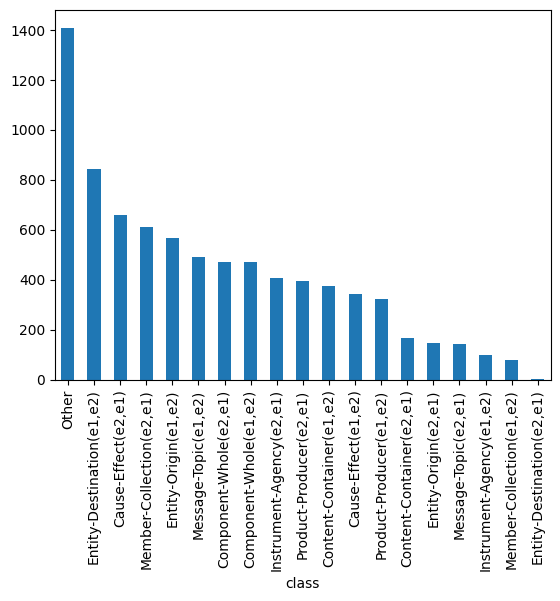

In [5]:
df['class'].value_counts()[:27].plot(kind='bar')

<Axes: xlabel='class'>

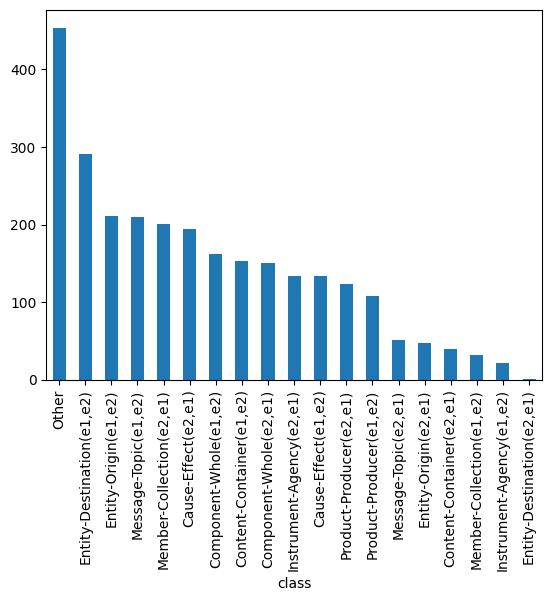

In [6]:
df_test['class'].value_counts()[:27].plot(kind='bar')

Checking same entity pairs with different classes

In [ ]:
# Group by element1 and element2, then count unique classes
class_counts = df.groupby(['element1', 'element2'])['class'].nunique()

# Filter pairs with more than one unique class
conflicting_pairs = class_counts[class_counts > 1].index

# Extract conflicting rows
conflicting_examples = df[df.set_index(['element1', 'element2']).index.isin(conflicting_pairs)]

# Show a few examples
print(conflicting_examples.sort_values(by=['element1', 'element2']).head(10))

        id                                           sentence  e1_position  \
1578  1579  This incident was an incursion of illegal alie...            7   
2255  2256  Those aliens travel to the deep space in secon...            1   
1818  1819  Nectar is the sweet flower sap that bees make ...            7   
6918  6919  Worker bees eating ordinary honey live only fo...            1   
298    299  A baby girl was murdered and her body stuffed ...            7   
311    312  In a shocking incident , the body of a 10-year...            6   
4927  4928  The dead body of a British tourist was found t...            2   
4046  4047  The book , compiled by the poet 's daughter , ...            1   
6697  6698  In this book , the Coptic Egyptian poet return...            2   
696    697  This book relates tales , which were recorded ...            1   

     element1  e2_position element2                      class  tag  
1578   aliens           10    space       Entity-Origin(e1,e2)   13  
2

In [ ]:
distribution = conflicting_pairs.value_counts().sort_index()

# Display results
print(f"Total conflicting pairs: {len(conflicting_pairs)}")
print("Distribution of conflicts:\n", distribution)

Total conflicting pairs: 28
Distribution of conflicts:
 element1     element2   
aliens       space          1
bees         honey          1
body         sack           1
book         poet           1
             tales          1
box          box            1
             controller     1
car          plant          1
clutch       eggs           1
congressmen  party          1
corn         spirits        1
cracks       earthquakes    1
data         database       1
driver       car            1
flight       aircrafts      1
gas          metal          1
hill         beans          1
letter       pocket         1
man          window         1
novelist     computer       1
plane        airport        1
population   individuals    1
professor    paper          1
ship         port           1
student      university     1
team         game           1
train        station        1
water        kettle         1
Name: count, dtype: int64


In [ ]:
# Count total unique (element1, element2) pairs
total_pairs = df.groupby(['element1', 'element2']).ngroups

# Count conflicting pairs (from previous result)
conflicting_pairs_count = len(conflicting_pairs)

# Calculate percentage
conflict_percentage = (conflicting_pairs_count / total_pairs) * 100

print(f"Total unique pairs: {total_pairs}")
print(f"Total conflicting pairs: {conflicting_pairs_count}")
print(f"Percentage of conflicting pairs: {conflict_percentage:.2f}%")

Total unique pairs: 7704
Total conflicting pairs: 28
Percentage of conflicting pairs: 0.36%


Building Knowledge Base

In [ ]:
semeval_df = df.copy()

In [ ]:
# Count occurrences of each (e1, e2, class) combination
pair_counts = semeval_df.groupby(["element1", "element2", "class"]).size().reset_index(name="count")

# Find the most frequent class for each entity pair
kb = pair_counts.loc[
    pair_counts.groupby(["element1", "element2"])["count"].idxmax(), ["element1", "element2", "class"]
]

# Convert to dictionary for quick lookup
knowledge_base = {(row["element1"], row["element2"]): row["class"] for _, row in kb.iterrows()}

print(f" Knowledge Base created with {len(knowledge_base)} unique entity pairs!")

 Knowledge Base created with 7704 unique entity pairs!


Load OSCAR Subset & Train Word2Vec

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.8 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

# Load the dataset in streaming mode
oscar_dataset = load_dataset("oscar", "unshuffled_deduplicated_en", split="train", streaming=True)

# Take approximately 200 MB of data
oscar_texts = [item['text'] for item in oscar_dataset.take(20000)]
print(f"Loaded {len(oscar_texts)} text samples.")

Loaded 20000 text samples.


Tokenization

In [ ]:
import nltk
from tqdm import tqdm

# Download tokenizer
nltk.download('punkt')

# Tokenize into sentences
all_sentences = []
for doc in tqdm(oscar_texts):
    sentences = nltk.sent_tokenize(doc)  # Split into sentences
    all_sentences.extend(sentences)

print(f"Total sentences extracted: {len(all_sentences)}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 20000/20000 [00:23<00:00, 866.27it/s]

Total sentences extracted: 843576


Saving file

In [ ]:
# Save sentences to a text file
with open("sentences.txt", "w", encoding="utf-8") as file:
    for sentence in all_sentences:
        file.write(sentence + "\n")  # Write each sentence on a new line

In [ ]:
from google.colab import files

# Download the file
files.download("sentences.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load sentences from the file
all_sentences = []
with open("sentences.txt", "r", encoding="utf-8") as file:
    for line in file:
        all_sentences.append(line.strip())  # Remove newline characters and add to the list

# Print the number of sentences loaded
print(f"Loaded {len(all_sentences)} sentences.")

Loaded 912042 sentences.


In [ ]:
  my_sentences = all_sentences[:400000]

Train word-2-vec

In [ ]:
from gensim.models import Word2Vec
import multiprocessing

# Train Word2Vec on OSCAR sentences
word2vec_model = Word2Vec(
    sentences=[sent.split() for sent in my_sentences],  # Tokenized sentences
    vector_size=100,  # Embedding size
    window=5,  # Context window
    min_count=5,  # Ignore rare words
    workers=multiprocessing.cpu_count(),
    sg=1  # Skip-gram model
)

# Save model
word2vec_model.save("word2vec_oscar.model")

print("Word2Vec training complete!")

Word2Vec training complete!


Find Sentences with Similar Entity Pairs - Optimized by inverted index and caching

In [ ]:
import itertools
from collections import defaultdict
from multiprocessing import Pool
from gensim.models import Word2Vec

# Load the Word2Vec model
w2v_model = Word2Vec.load("word2vec_oscar.model")

# Cache for similar words
similar_words_cache = {}

def get_similar_words(word, top_n=3, threshold=0.6):
    """Fetch similar words from Word2Vec model, with caching and thresholding."""
    if word in similar_words_cache:
        return similar_words_cache[word]  # Use cached result
    try:
        # Get the top N similar words along with their similarity score
        similar = [(w, score) for w, score in w2v_model.wv.most_similar(word, topn=top_n) if score >= threshold]
    except KeyError:
        similar = []  # Handle case where the word is not in the vocabulary
    similar_words_cache[word] = similar  # Store in cache
    return similar

# Precompute similar words for all unique entities
unique_entities = set()
for (e1, e2) in knowledge_base.keys():
    unique_entities.add(e1)
    unique_entities.add(e2)

for entity in unique_entities:
    similar_words_cache[entity] = get_similar_words(entity, top_n=3, threshold=0.7)

# Build inverted index for faster lookups
inverted_index = defaultdict(set)
for idx, sentence in enumerate(my_sentences):
    words = set(sentence.split())  # Split sentence into words
    for word in words:
        inverted_index[word].add(idx)  # Map word to sentence index

# Function to process a single entity pair
def process_entity_pair(args):
    (e1, e2), relation = args
    labeled_data = []

    # Skip if e1 and e2 are the same
    if e1 == e2:
        return labeled_data  # Skip invalid pairs

    # Get similar words for e1 and e2
    similar_e1 = similar_words_cache.get(e1, [])
    similar_e2 = similar_words_cache.get(e2, [])

    # Find candidate sentences containing e1 and e2
    candidate_sentences = inverted_index[e1] & inverted_index[e2]
    for idx in candidate_sentences:
        sentence = my_sentences[idx]
        # Verify that both e1 and e2 are present in the sentence
        if e1 in sentence and e2 in sentence:
            labeled_data.append((sentence, e1, e2, relation))

    # Find candidate sentences containing similar words for e1 and e2
    for (se1, _), (se2, _) in itertools.product(similar_e1, similar_e2):
        # Skip if similar words are the same
        if se1 == se2:
            continue  # Skip invalid pairs

        # Retrieve candidate sentences for similar words
        candidate_sentences = inverted_index[se1] & inverted_index[se2]
        for idx in candidate_sentences:
            sentence = my_sentences[idx]
            if se1 not in sentence or se2 not in sentence:
              continue  # Skip if similar entities are missing
            # Verify that both se1 and se2 are present in the sentence
            if se1 in sentence and se2 in sentence:
                labeled_data.append((sentence, e1, e2, relation))

    return labeled_data

# Process entity pairs in parallel
with Pool() as pool:
    results = pool.map(process_entity_pair, knowledge_base.items())

# Combine results
labeled_data = list(itertools.chain.from_iterable(results))

print(f"✅ Found {len(labeled_data)} new labeled sentences!")

✅ Found 16471 new labeled sentences!


In [ ]:
unique_labeled_data = set(labeled_data)
labeled_data = list(unique_labeled_data)

In [ ]:
print(f" Found {len(labeled_data)} new labeled sentences!")

 Found 15559 new labeled sentences!


In [ ]:
# List to store final filtered labeled data
filtered_labeled_data = []

# Filter labeled_data to remove entries where either e1 or e2 is not in the sentence
for sentence, e1, e2, relation in labeled_data:
    if e1 in sentence and e2 in sentence:
        filtered_labeled_data.append((sentence, e1, e2, relation))

# Now, filtered_labeled_data contains only sentences where both e1 and e2 are present
print(f"✅ Found {len(filtered_labeled_data)} valid labeled sentences!")

✅ Found 11302 valid labeled sentences!


In [ ]:
# List to store labeled data after filtering
selected_labeled_data = []

# Max words allowed in a sentence
max_words = 80

# Filter sentences with more than 80 words
for sentence, e1, e2, relation in filtered_labeled_data:
    if len(sentence.split()) <= max_words:
        selected_labeled_data.append((sentence, e1, e2, relation))

print(f"✅ Found {len(filtered_labeled_data)} labeled sentences after filtering!")

✅ Found 11302 labeled sentences after filtering!


In [ ]:
labelsMapping = {'Other': 0,'Message-Topic(e1,e2)': 1, 'Message-Topic(e2,e1)': 2,
                    'Product-Producer(e1,e2)': 3, 'Product-Producer(e2,e1)': 4,
                    'Instrument-Agency(e1,e2)': 5, 'Instrument-Agency(e2,e1)': 6,
                    'Entity-Destination(e1,e2)': 7, 'Entity-Destination(e2,e1)': 8,
                    'Cause-Effect(e1,e2)': 9, 'Cause-Effect(e2,e1)': 10,
                    'Component-Whole(e1,e2)': 11, 'Component-Whole(e2,e1)': 12,
                    'Entity-Origin(e1,e2)': 13, 'Entity-Origin(e2,e1)': 14,
                    'Member-Collection(e1,e2)': 15, 'Member-Collection(e2,e1)': 16,
                    'Content-Container(e1,e2)': 17, 'Content-Container(e2,e1)': 18}

Combining Data

In [ ]:
import nltk
import pandas as pd

def add_labeled_data(labeled_data, df):
    # Create new rows for the DataFrame
    new_entries = []


    for sentence, e1, e2, relation in labeled_data:
        # Tokenize the sentence
        tokens = nltk.word_tokenize(sentence)

        # Ensure both e1 and e2 exist in the sentence before finding positions
        if e1 in tokens and e2 in tokens:
            e1_position = tokens.index(e1)  # 0-based index for e1
            e2_position = tokens.index(e2)  # 0-based index for e2

            # Element texts (the entities themselves)
            element1 = e1
            element2 = e2

            # Ensure the relation is correctly mapped
            relation_tag = labelsMapping.get(relation, -1)  # Default to -1 if relation not found

            # Add new row to the list
            new_entries.append([None, sentence, e1_position, element1, e2_position, element2, relation, relation_tag])

        else:
            # Handle the case where e1 or e2 are not in the sentence (skip or mark it)
            print(f"Skipping sentence because either e1 ('{e1}') or e2 ('{e2}') is not in the tokens: {sentence}")

    # Create a new DataFrame with the new entries
    new_df = pd.DataFrame(new_entries, columns=["id", "sentence", "e1_position", "element1", "e2_position", "element2", "class", "tag"])

    # Filter out duplicate rows (based on sentence) from the new DataFrame
    new_df = new_df.drop_duplicates(subset=["sentence"], keep="last")

    # Combine with the original DataFrame
    df = pd.concat([df, new_df], ignore_index=True)

    return df


In [ ]:
ds_df = add_labeled_data(selected_labeled_data,df)

Skipping sentence because either e1 ('devices') or e2 ('phones') is not in the tokens: But Google Wear and Tizen devices are designed to pair with smartphones using the Android OS, so you won’t get full functionality when pairing with an iPhone.
Skipping sentence because either e1 ('data') or e2 ('database') is not in the tokens: In order to register any domain, you must provide certain personal information that you may not wish to be publically searchable in the Whois database.
Skipping sentence because either e1 ('book') or e2 ('material') is not in the tokens: All costumes were made of dozens of different paper materials such as wrapping paper, discarded books and newspapers, and even toilet-paper.
Skipping sentence because either e1 ('engine') or e2 ('train') is not in the tokens: · Improved train clear optionNow when you clear the train, all engines are removed from the train builder address.
Skipping sentence because either e1 ('book') or e2 ('development') is not in the tokens: 

In [ ]:
ds_df

,id,sentence,e1_position,element1,e2_position,element2,class,tag
0,1,The system as described above has its greatest...,12,configuration,15,elements,"Component-Whole(e2,e1)",12
1,2,The child was carefully wrapped and bound into...,1,child,9,cradle,Other,0
2,3,The author of a keygen uses a disassembler to ...,1,author,7,disassembler,"Instrument-Agency(e2,e1)",6
3,4,A misty ridge uprises from the surge .,2,ridge,6,surge,Other,0
4,5,The student association is the voice of the un...,1,student,2,association,"Member-Collection(e1,e2)",15
...,...,...,...,...,...,...,...,...
16802,None,"Out of 70 million only 466,666 people probably...",6,people,17,world,"Entity-Destination(e1,e2)",7
16803,None,"Aug 09, 2016nbsp;0183;32;'39 - '47 34 888 poke...",17,wheels,16,truck,"Component-Whole(e1,e2)",11
16804,None,pool pump system above ground pool pump and fi...,2,system,8,filter,"Component-Whole(e2,e1)",12
16805,None,"He was holding a new photo now, one he’d taken...",23,picture,5,photo,"Entity-Origin(e1,e2)",13


In [ ]:
ds_df["id"] = range(1, 1+len(ds_df))

In [ ]:
ds_df

,id,sentence,e1_position,element1,e2_position,element2,class,tag
0,1,The system as described above has its greatest...,12,configuration,15,elements,"Component-Whole(e2,e1)",12
1,2,The child was carefully wrapped and bound into...,1,child,9,cradle,Other,0
2,3,The author of a keygen uses a disassembler to ...,1,author,7,disassembler,"Instrument-Agency(e2,e1)",6
3,4,A misty ridge uprises from the surge .,2,ridge,6,surge,Other,0
4,5,The student association is the voice of the un...,1,student,2,association,"Member-Collection(e1,e2)",15
...,...,...,...,...,...,...,...,...
16802,16803,"Out of 70 million only 466,666 people probably...",6,people,17,world,"Entity-Destination(e1,e2)",7
16803,16804,"Aug 09, 2016nbsp;0183;32;'39 - '47 34 888 poke...",17,wheels,16,truck,"Component-Whole(e1,e2)",11
16804,16805,pool pump system above ground pool pump and fi...,2,system,8,filter,"Component-Whole(e2,e1)",12
16805,16806,"He was holding a new photo now, one he’d taken...",23,picture,5,photo,"Entity-Origin(e1,e2)",13


In [ ]:
# Export the DataFrame to a CSV file
ds_df.to_csv("large_ds_df_exported.csv", index=False)


Converting it into < e1 > < / e1 > format like original training data


In [ ]:
import pandas as pd

# Load your dataframe (assuming df is already created)
# Example: df = pd.read_csv("your_file.csv")

# Function to format the sentence
def format_sentence(row):
    sentence = row["sentence"].replace(row["element1"], f"<e1> {row['element1']} </e1>")
    sentence = sentence.replace(row["element2"], f"<e2> {row['element2']} </e2>")
    return sentence

# Apply formatting
ds_df["formatted_sentence"] = ds_df.apply(format_sentence, axis=1)

# Save only 'class' and formatted 'sentence' columns to a CSV file
ds_df[['class', 'formatted_sentence']].to_csv("dataset.csv", index=False, header=False)

print("CSV file saved as dataset.csv")


CSV file saved as dataset.csv


In [ ]:
!head dataset.csv

"Component-Whole(e2,e1)",the system described above has its greatest application arrayed <e1> configuration </e1> antenna <e2> elements </e2>
Other,the <e1> child </e1> was carefully wrapped and bound into the <e2> cradle </e2> means cord
"Instrument-Agency(e2,e1)",the <e1> author </e1> keygen uses <e2> disassembler </e2> look the raw assembly code
Other,misty <e1> ridge </e1> uprises from the <e2> surge </e2>
"Member-Collection(e1,e2)",the <e1> student </e1> <e2> association </e2> the voice the undergraduate <e1> student </e1> population the state university new york buffalo
Other,this the sprawling <e1> complex </e1> that peru largest <e2> producer </e2> silver
"Cause-Effect(e2,e1)",the current view that the chronic <e1> inflammation </e1> the distal part the stomach caused helicobacter pylori <e2> infection </e2> results increased acid production from the noninfected upper corpus region the stomach
"Entity-Destination(e1,e2)",people have been moving back into <e2> downtown </e2>
"Co